## Figure S6 - Compare displacement estimated from velocity v.s. the one reconstructed from time-series

In [17]:
%matplotlib inline
import os
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.defaults.plot import *
from mintpy.objects import sensor
from mintpy.utils import utils as ut, ptime, plot as pp, readfile
from mintpy import view, save_roipac

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1')
os.chdir(work_dir)
print('Go to directory', work_dir)

## Common setting
ref_lat, ref_lon = 31.930, 130.864

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1


### Reconstruct displacement from time-series

In [20]:
data_dirs = [os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosAT424/mintpy'),
             os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosDT73/mintpy')]
unw_files = []
for data_dir in data_dirs:
    os.chdir(data_dir)
    print('Go to directory', data_dir)

    # basic info
    date12 = readfile.read_attribute('velocity.h5')['DATE12']
    unw_vel_file = os.path.join(data_dir, '{}.unw'.format(date12))
    unw_recon_file = os.path.join(data_dir, '{}_recon.unw'.format(date12))
    unw_files.append(unw_recon_file)
    unw_files.append(unw_vel_file)

    # save deformation to binary file in ROIPAC format
    scp_args = 'timeseries_ERA5_ramp_demErr.h5 {d} -m maskTempCoh.h5 --ref-lalo {lat} {lon} -o {o}'.format(d=date12, lat=ref_lat, lon=ref_lon, o=unw_recon_file)
    print('save_roipac.py', scp_args)
    #save_roipac.main(scp_args.split())

# Go back to work directory
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy
save_roipac.py timeseries_ERA5_ramp_demErr.h5 20080929_20100520 -m maskTempCoh.h5 --ref-lalo 31.93 130.864 -o /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520_recon.unw
Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosDT73/mintpy
save_roipac.py timeseries_ERA5_ramp_demErr.h5 20081012_20100302 -m maskTempCoh.h5 --ref-lalo 31.93 130.864 -o /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosDT73/mintpy/20081012_20100302_recon.unw
Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1


save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1/dis_map_vel_vs_ts.png


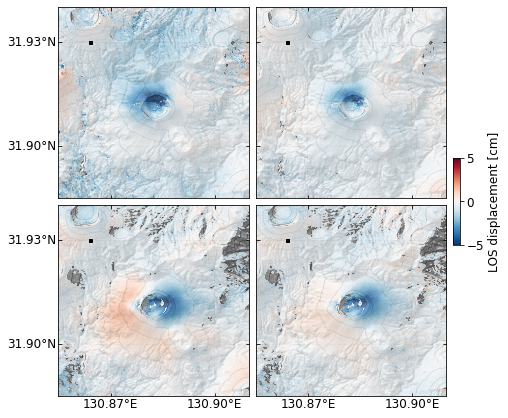

In [28]:
## Plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[6,6])

# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84')
opt = ' --sub-lat 31.885 31.94 --sub-lon 130.855 130.91 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu_r -v -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar --noscalebar --alpha 0.7 '
opt += ' --noverbose '

lalo_locs = ['1 0 0 0', '0 0 0 0',
             '1 0 0 1', '0 0 0 1']
for ax, unw_file, lalo_loc in zip(axs.flatten(), unw_files, lalo_locs):
    cmd = 'view.py {f} --lalo-loc {l} {o}'.format(f=unw_file, l=lalo_loc, o=opt);  #print(cmd)
    data, atr, inps = view.prep_slice(cmd)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
fig.subplots_adjust(hspace=0.04, wspace=0.03, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
cax = fig.add_axes([0.965, 0.4, 0.015, 0.2])
cbar = plt.colorbar(im, cax=cax, orientation='vertical')#, ticks=[-2.5, 0, 2.5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_map_vel_vs_ts.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()